In [1]:
import pandas as pd
import numpy as np
import random
import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt

# Prepare global variable

In [2]:
class Generator:

    def __init__(self, num_of_line: int):

        self.num_of_line = num_of_line
        
        # Prepare columns
        self.columns = ["firstname", "lastname", "middlename", "sex", "birthdate", "country", "university"]

        # Prepare data
        self.firstname = ["Loc", "Chino", "An", "Chi", "Peter", "Parker", "Ha", 
                          "Harry", "Curry", "Thompson", "Nhi", "Tuyet"]
        self.lastname = ["Nguyen", "Kokoto", "Le", "Lai", "Parker", "Peter", 
                         "Hoang", "Potter", "Stephen", "Klay", "Vo"]
        self.middlename = ["Duc", "Capu", "Bao", "Trong", "Spiderman", "Tom", "Thu", 
                           "Lily", "Thanh", "Tram", "Gopal", "Michael"]

        self.sex_ = ["male", "female"]

        self.start_date = datetime.date(1975, 4, 30)
        self.end_date = datetime.date(2010, 1, 1)

        self.countries = ["US", "VN", "China", "Japan", "Hongkong", "Taiwan", 
                          "Lao", "Campuchia", "New-zeland", "Australia"]

        self.universities = ["HCM University of Science", "Stanford University", "Cambridge University", 
                             "HCM University of Technology", "CMU", "MIU", "Portland State University"]
            
    def generate_name(self) -> tuple:
        first = random.randint(0, len(self.firstname) - 1)
        last = random.randint(0, len(self.lastname) - 1)
        middle = random.randint(0, len(self.middlename) - 1)

        return (self.firstname[first], self.lastname[last], self.middlename[middle])

    def generate_sex(self) -> str:
        return self.sex_[random.randint(0, 1)]

    def generate_birthdate(self) -> str:
        random_number_of_days = random.randrange((self.end_date - self.start_date).days)
        random_date = self.start_date + datetime.timedelta(days=random_number_of_days)
        return random_date.strftime("%m/%d/%Y")
    
    def generate_country(self) -> str:
        return self.countries[random.randint(0, len(self.countries) - 1)]

    def generate_university(self) -> list:
        return self.universities[random.randint(0, len(self.universities) - 1)]

    def to_csv(self, file_name: str):
        with open(file=file_name, mode="w", encoding="utf-8") as writer:
            writer.write(",".join(self.columns) + "\n")

            for row in range(0, self.num_of_line):
                ID = row
                firstname, lastname, middlename = self.generate_name()
                sex = self.generate_sex()
                birthdate = self.generate_birthdate()
                country = self.generate_country()
                university = self.generate_university()

                writer.write(",".join([firstname, 
                                       lastname, 
                                       middlename, 
                                       sex, 
                                       birthdate, 
                                       country, 
                                       university]) + "\n")


sizes = [10]
for milestone in [10, 100, 1000, 10000, 100000]:
    for step in range(2, 11):
        sizes.append(step * milestone)
        
input_filenames = []
output_filenames = []

for size_ in sizes:
    input_filename = f"sample/input-{size_}.csv"
    output_filename = f"sample/output-{size_}.csv"
    
    input_filenames.append(input_filename)
    output_filenames.append(output_filename)

# Generate csv files in /sample/...

In [3]:
for index, size_ in enumerate(sizes):
    
    input_filename = input_filenames[index]
    output_filename = output_filenames[index]
    
    generator = Generator(size_)
    generator.to_csv(input_filename)

# Support functions

In [4]:
class PandasCalculator():
        
    def reading_performance(self, file_name: str):
        start = datetime.datetime.now()
        data = pd.read_csv(file_name)
        end = datetime.datetime.now()
        
        return (end - start).total_seconds()
    
    def writing_performance(self, source_name: str, file_name):
        data = pd.read_csv(source_name)
        
        start = datetime.datetime.now()
        data.to_csv(file_name)
        end = datetime.datetime.now()
        
        return (end - start).total_seconds()
    
class CsvCalculator():
    
    def reading_performance(self, file_name: str, is_dict=False):
        start = datetime.datetime.now()
        with open(file_name, mode="r") as csv_file:
            if is_dict:
                csv_writer = csv.DictReader(csv_file)
            else:
                csv_writer = csv.reader(csv_file)
                
            for line in csv_writer:
                pass
        
        end = datetime.datetime.now()
        return (end - start).total_seconds()      
    
    def writing_performance(self, source_name: str, output_name: str, is_dict=False):
        
        with open(source_name, mode='r') as csv_input:
            if is_dict:
                data = csv.DictReader(csv_input)
            else:
                data = csv.reader(csv_input)
            
            start = datetime.datetime.now()

            with open(output_name, mode='w') as csv_output:
                if is_dict:
                    csv_writer = csv.DictWriter(csv_output, fieldnames=data.fieldnames)
                    csv_writer.writeheader()
                else:
                    csv_writer = csv.writer(csv_output)
                
                csv_writer.writerows(data)
            
            end = datetime.datetime.now()
            
        return (end - start).total_seconds()
        
pandas_calculator = PandasCalculator()
csv_calculator = CsvCalculator()


# Estimate reading and writing performance

In [5]:
reading_times_pandas = []
reading_times_csv = []
reading_times_csv_dict = []

for size_ in sizes:
    reading_times_pandas.append(pandas_calculator.reading_performance(f"sample/input-{size_}.csv"))
    
    reading_times_csv.append(csv_calculator.reading_performance(f"sample/input-{size_}.csv", 
                                                                False))
                             
    reading_times_csv_dict.append(csv_calculator.reading_performance(f"sample/input-{size_}.csv", 
                                                                     False))


In [ ]:
writing_times_pandas = []
writing_times_csv = []
writing_times_csv_dict = []

for size_ in sizes:
    writing_times_pandas.append(pandas_calculator.writing_performance(f"sample/input-{size_}.csv", 
                                                                      f"sample/output-{size_}.csv"))
    
    writing_times_csv.append(csv_calculator.writing_performance(f"sample/input-{size_}.csv",
                                                                f"sample/output-{size_}.csv",
                                                                False))
                             
    writing_times_csv_dict.append(csv_calculator.writing_performance(f"sample/input-{size_}.csv",
                                                                     f"sample/output-{size_}.csv",
                                                                     True))


# CSV vs Pandas performance comparison

## Visualize reading performance for < 5000 lines CSV file

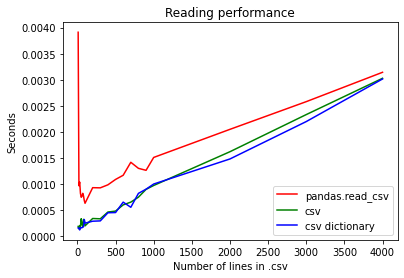

In [14]:
scale = 22

plt.plot(sizes[0:scale], reading_times_pandas[0:scale], "red", label="pandas.read_csv")
plt.plot(sizes[0:scale], reading_times_csv[0:scale], "green", label="csv")
plt.plot(sizes[0:scale], reading_times_csv_dict[0:scale], "blue", label="csv dictionary")

plt.title("Reading performance")
plt.xlabel("Number of lines in .csv")
plt.ylabel("Seconds", )

plt.ticklabel_format(style='plain')
plt.legend()

## Visualize reading performance for 10 .. 1'000'000 lines CSV file

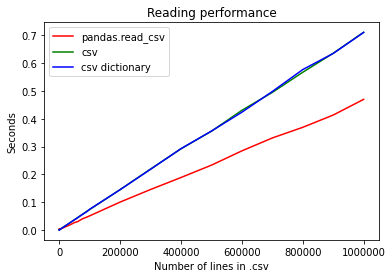

In [15]:
plt.plot(sizes, reading_times_pandas, "red", label="pandas.read_csv")
plt.plot(sizes, reading_times_csv, "green", label="csv")
plt.plot(sizes, reading_times_csv_dict, "blue", label="csv dictionary")

plt.title("Reading performance")
plt.xlabel("Number of lines in .csv")
plt.ylabel("Seconds", )

plt.ticklabel_format(style='plain')
plt.legend()

## Visualize writing performance

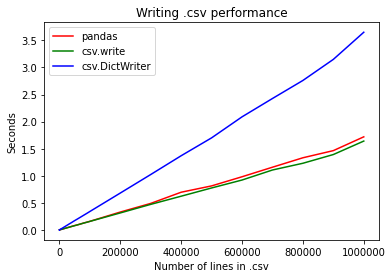

In [19]:
plt.plot(sizes, writing_times_pandas, "red", label="pandas")
plt.plot(sizes, writing_times_csv, "green", label="csv.write")
plt.plot(sizes, writing_times_csv_dict, "blue", label="csv.DictWriter")

plt.title("Writing .csv performance")
plt.xlabel("Number of lines in .csv")
plt.ylabel("Seconds")

plt.ticklabel_format(style='plain')
plt.legend()

# Conclusion

## Reading performance:

1. csv.reader and csv.DictReader has the same performance on reading
2. csv.reader & csv.DictReader is faster than pandas.read_csv for < 5000 lines .csv file
3. When the csv size exceedes 5000 lines, the performance of csv.reader & csv.DictReader drops significant, compare to Pandas module

## Writing performance

1. csv.DictWriter has the worst performance
2. csv.writer and pandas.DataFrame.to_csv has the same performance

## Should I use Pandas or CSV ?

1. Different from csv, pandas is not a build-in module and have to be installed maunally. In general, this is considred as a disadvantage of pandas, because it increases the dependency size of project

2. csv is appropriate for small size csv.

3. When it comes to data analytics, pandas is absolutely a better choice, compared to csv. It provides many methods, i.e. the DataFrame, Series, etc. to manipulate the data. Furthermore, pandas uses numpy under the hood (written 50 - 50 in C and Python), which significantly optimizes the performance.

